In [328]:
# Using seaborn heatmaps

In [329]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns; sns.set()
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from utils.file_utils import save_pkl, load_pkl
from scipy.stats import percentileofscore

In [330]:
store_dir = "image_sets/"

drop_out = False
n_classes = 2
model_type = "clam_sb"
model_size = 'small'
exp_code = "exp_6" + "_s1"
ckpt_path = "s_0_checkpoint.pt"
results_dir = "image_sets/results"

data_dir = "image_sets/original/"
image_ext = ".tif"
patch_dir = "image_sets/patches/"
feat_dir = "image_sets/features/"
actual_feat_dir = "image_sets/patches/fungal_vs_nonfungal_resnet_features/pt_files/"

save_path = os.path.join(results_dir, exp_code, "heatmaps")
if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [331]:
heatmap_dict = load_pkl(os.path.join(results_dir, exp_code, "heatmap_dict.pkl"))

In [332]:
image_file = heatmap_dict[80]

image_name = image_file['filename']
attention_scores = image_file['attention_scores']
coords_list = image_file['coords_list']

print(image_name)

F018a10


In [333]:
ref = attention_scores[0].copy()
ref = [float(x) for x in ref]
scores = []
percentiles = []
for score in ref:
    percentile = percentileofscore(ref, score)
    percentiles.append(percentile/100)
    scores.append(score)
print(ref)
print()
print(scores)
print()
print(percentiles)

scores = np.reshape(scores, [4, 6])
percentiles = np.reshape(percentiles, [4, 6])
# print()
# print(scores)

[0.3300535976886749, 0.011315137147903442, 0.007000758778303862, 0.0076096029952168465, 0.025342663750052452, 0.008262666873633862, 0.017232442274689674, 0.031781166791915894, 0.0630199983716011, 0.012918423861265182, 0.008938699029386044, 0.013312670402228832, 0.04461478441953659, 0.11898595094680786, 0.042376525700092316, 0.032099075615406036, 0.009792845696210861, 0.010621706955134869, 0.005568111781030893, 0.13008859753608704, 0.01650172285735607, 0.027408068999648094, 0.008030815050005913, 0.017124012112617493]

[0.3300535976886749, 0.011315137147903442, 0.007000758778303862, 0.0076096029952168465, 0.025342663750052452, 0.008262666873633862, 0.017232442274689674, 0.031781166791915894, 0.0630199983716011, 0.012918423861265182, 0.008938699029386044, 0.013312670402228832, 0.04461478441953659, 0.11898595094680786, 0.042376525700092316, 0.032099075615406036, 0.009792845696210861, 0.010621706955134869, 0.005568111781030893, 0.13008859753608704, 0.01650172285735607, 0.027408068999648094,

In [334]:
# df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# print(df)

# df = np.array([[1, 2, 4], [3, 4, 6], [1, 2, 4], [3, 4, 6]])
# print(df)

# df = pd.DataFrame(percentiles)
df = pd.DataFrame(scores)
print(df)

          0         1         2         3         4         5
0  0.330054  0.011315  0.007001  0.007610  0.025343  0.008263
1  0.017232  0.031781  0.063020  0.012918  0.008939  0.013313
2  0.044615  0.118986  0.042377  0.032099  0.009793  0.010622
3  0.005568  0.130089  0.016502  0.027408  0.008031  0.017124


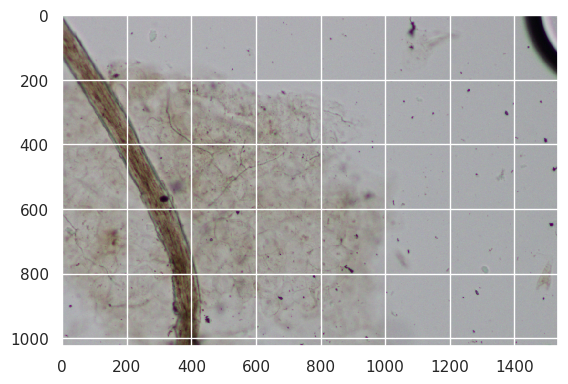

In [335]:
# img = np.array(Image.open(os.path.join(data_dir, image_name+image_ext)))
# plt.imshow(img)

map_img = mpimg.imread(os.path.join(data_dir, image_name+image_ext))
map_img = map_img[0:1024, 0:1536]
plt.imshow(map_img)

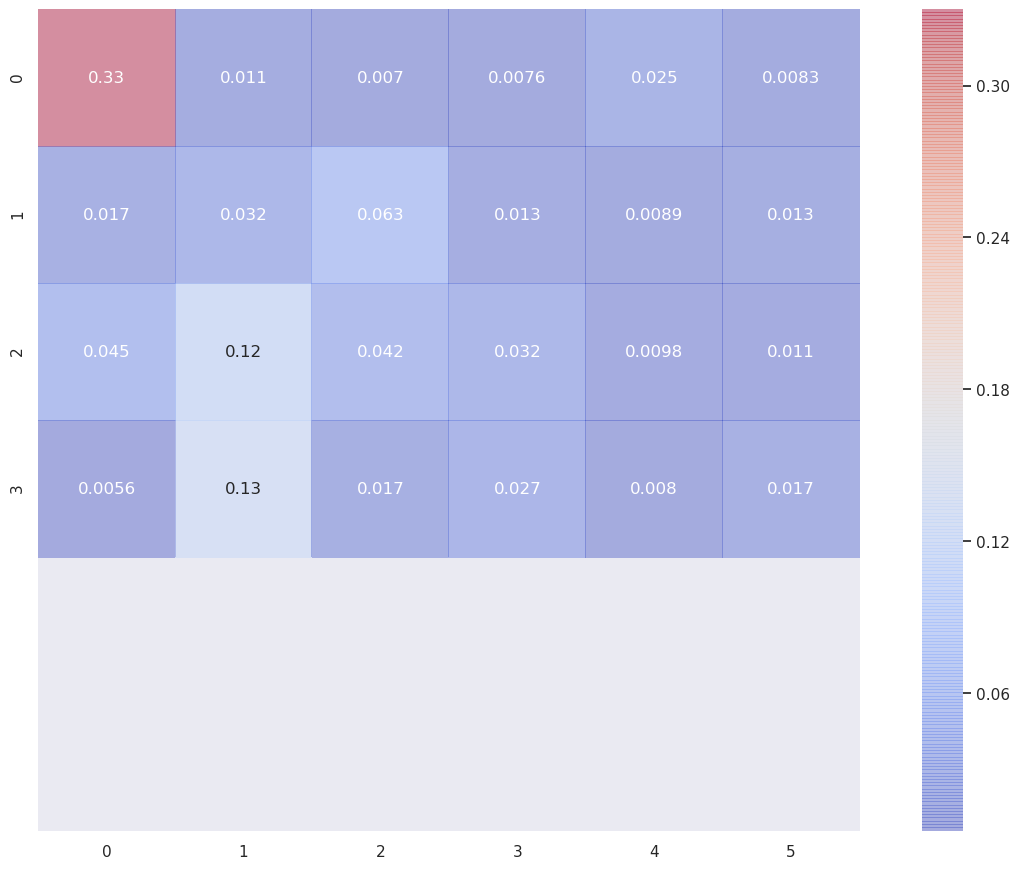

In [336]:
px = 1/96  # pixel in inches
ax = plt.subplots(figsize=(1536*px, 1024*px)) # Doesn't seem to work in Jupyter NB.
# ax = plt.subplots(figsize=(10, 12))
hmax = sns.heatmap(df,
            cmap = "coolwarm",
            alpha = 0.4, # whole heatmap is translucent
            annot = True,
            square = True,
            zorder = 2
            )
hmax.set_ylim(sorted(hmax.get_xlim(), reverse=True))

# hmax.imshow(map_img,
#           aspect = hmax.get_aspect(),
#           extent = hmax.get_xlim() + hmax.get_ylim(),
#           zorder = 1) #put the map under the heatmap

save_name = "1.png"
plt.savefig(save_name)